# Example of AuthorTopicModel 

"The Author-Topic Model for Authors and Documents" by Rosen-Zvi, et al. (UAI 2004)

In [1]:
import pickle
import logging

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from ptm import AuthorTopicModel
from ptm.utils import convert_cnt_to_list, get_top_words

logger = logging.getLogger('AuthorTopicModel')
logger.propagate=False

%matplotlib inline

## Load CORA dataset

The original dataset from: https://people.cs.umass.edu/~mccallum/data.html

In [2]:
doc_ids = pickle.load(open('../data/cora/doc_ids.pkl', 'rb'))
doc_cnt = pickle.load(open('../data/cora/doc_cnt.pkl', 'rb'))
doc_author = pickle.load(open('../data/cora/doc_authorid.pkl', 'rb'))
author_name = pickle.load(open('../data/cora/authorid_authorname.pkl', 'rb'))
voca = pickle.load(open('../data/cora/voca.pkl', 'rb'))

In [3]:
corpus = convert_cnt_to_list(doc_ids, doc_cnt)
n_doc = len(corpus)
n_topic = 10
n_author = len(author_name)
n_voca = len(voca)
max_iter = 50

## Fit author-topic model

In [4]:
model = AuthorTopicModel(n_doc, n_voca, n_topic, n_author)
model.fit(corpus, doc_author, max_iter=max_iter)

2016-02-14 22:04:27 INFO:AuthorTopicModel:[INIT] 0	elapsed_time:63.54	log_likelihood:-10863554.38
2016-02-14 22:05:30 INFO:AuthorTopicModel:[INIT] 1	elapsed_time:63.58	log_likelihood:-10647481.99
2016-02-14 22:06:34 INFO:AuthorTopicModel:[INIT] 2	elapsed_time:63.74	log_likelihood:-10492422.12
2016-02-14 22:07:38 INFO:AuthorTopicModel:[INIT] 3	elapsed_time:63.77	log_likelihood:-10357087.07
2016-02-14 22:08:40 INFO:AuthorTopicModel:[INIT] 4	elapsed_time:62.19	log_likelihood:-10229123.70
2016-02-14 22:09:35 INFO:AuthorTopicModel:[INIT] 5	elapsed_time:54.96	log_likelihood:-10096179.15
2016-02-14 22:10:30 INFO:AuthorTopicModel:[INIT] 6	elapsed_time:54.89	log_likelihood:-9943646.09
2016-02-14 22:11:25 INFO:AuthorTopicModel:[INIT] 7	elapsed_time:54.84	log_likelihood:-9769853.39
2016-02-14 22:12:22 INFO:AuthorTopicModel:[INIT] 8	elapsed_time:57.85	log_likelihood:-9598314.53
2016-02-14 22:13:23 INFO:AuthorTopicModel:[INIT] 9	elapsed_time:60.43	log_likelihood:-9453899.31
2016-02-14 22:14:22 INFO

## Print top 10 words for each topic

In [5]:
for k in range(n_topic):
    top_words = get_top_words(model.TW, voca, k, 10)
    print('topic ', k , ','.join(top_words))

topic  0 algorithm,problem,time,model,function,bound,show,result,optimal,complexity
topic  1 network,service,realtime,control,performance,application,paper,routing,traffic,packet
topic  2 data,query,database,information,algorithm,rule,view,technique,document,structure
topic  3 system,distributed,protocol,communication,application,message,file,paper,performance,network
topic  4 learning,network,system,method,approach,task,paper,problem,model,neural
topic  5 image,model,object,using,surface,motion,robot,algorithm,method,visual
topic  6 parallel,program,performance,memory,data,processor,analysis,application,compiler,machine
topic  7 system,design,software,language,application,paper,research,tool,object,support
topic  8 agent,system,model,language,planning,logic,constraint,plan,action,paper
topic  9 problem,method,algorithm,linear,function,result,paper,solution,technique,matrix


## Plot topic distribution of random author

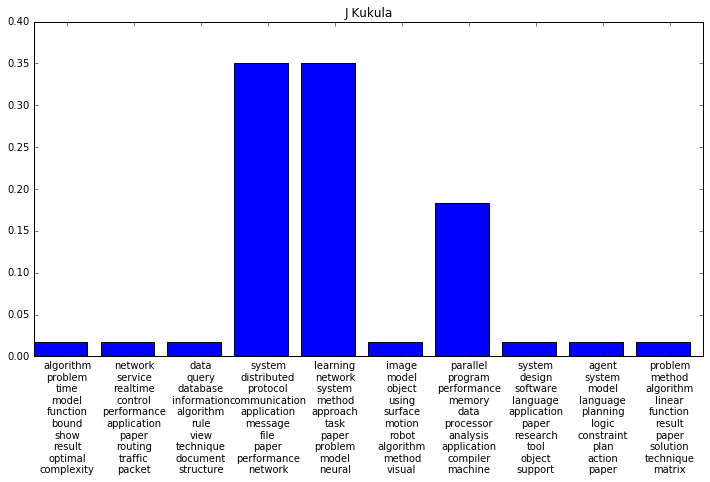

In [6]:
author_id = 7
fig = plt.figure(figsize=(12,6))
plt.bar(range(n_topic), model.AT[author_id]/np.sum(model.AT[author_id]))
plt.title(author_name[author_id])
plt.xticks(np.arange(n_topic)+0.5, ['\n'.join(get_top_words(model.TW, voca, k, 10)) for k in range(n_topic)])
plt.show()

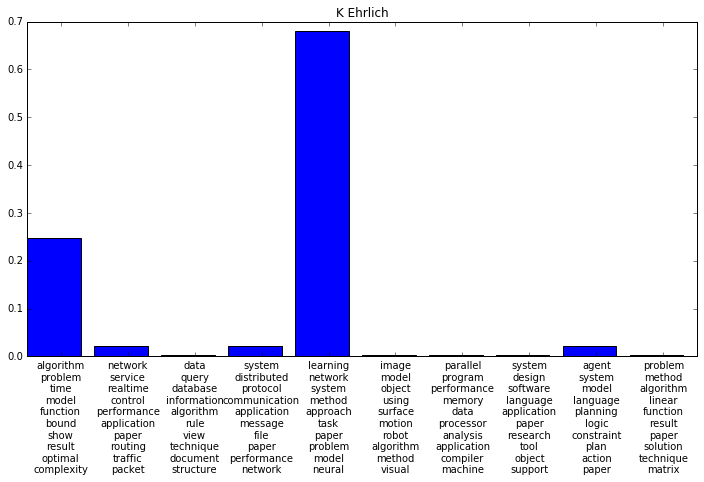

In [7]:
author_id = 32
fig = plt.figure(figsize=(12,6))
plt.bar(range(n_topic), model.AT[author_id]/np.sum(model.AT[author_id]))
plt.title(author_name[author_id])
plt.xticks(np.arange(n_topic)+0.5, ['\n'.join(get_top_words(model.TW, voca, k, 10)) for k in range(n_topic)])
plt.show()